In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
%run ../src/acc_clusters
%run ../src/acc_df

In [3]:
Ac = Acc_data('../data/cleaned/coll_coord.csv')
Cy = Ac.get_cyclist_coll()
X = np.array(Cy[['longitude','latitude']])

In [48]:
n = 2000

In [49]:
clusterer = AgglomerativeClustering(n_clusters=n, linkage='ward')

In [50]:
clusterer.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None,
            n_clusters=2000, pooling_func='deprecated')

In [51]:
l = clusterer.labels_
len(np.unique(l))

2000

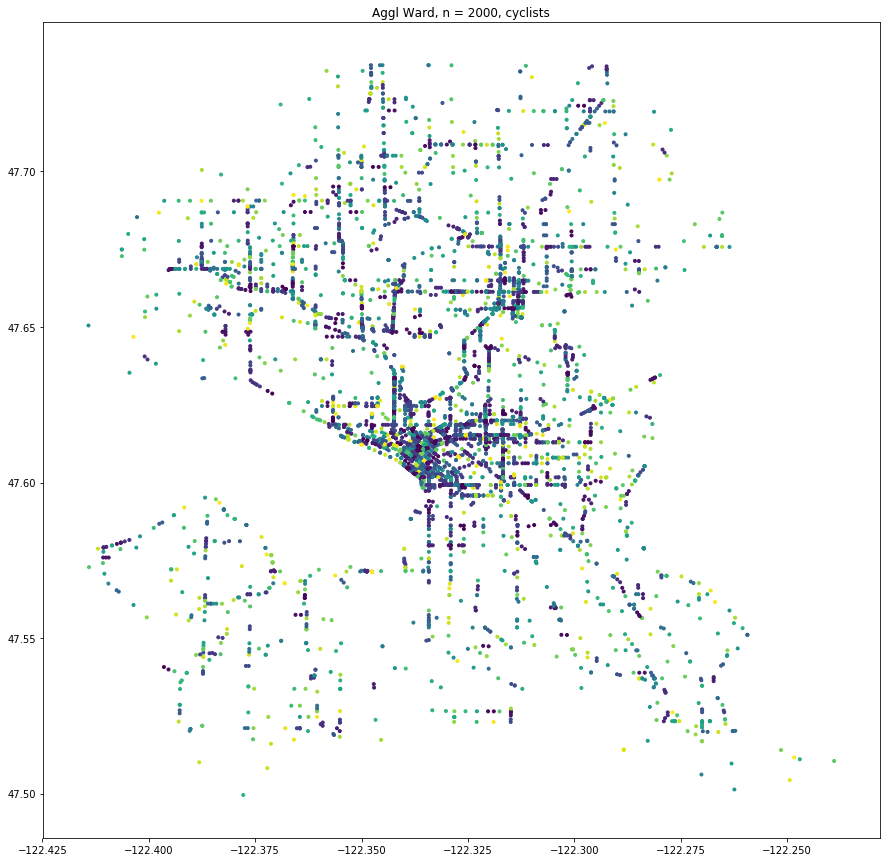

In [52]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(X[:,0],X[:,1],c=l,marker='.')

plt.title('Aggl Ward, n = {}, cyclists'.format(n))
plt.savefig('../images_part2/agglWard_{}_cy.png'.format(n))

In [53]:
clusterer.affinity

'euclidean'

In [54]:
l_u=np.unique(clusterer.labels_)

In [55]:
lt=[(s,len(X[l==s])) for s in l_u]

In [56]:
L = pd.DataFrame(lt)

In [60]:
L.sort_values(1,axis=0, ascending=False).groupby(1).count()

,0
1,
1,749
2,499
3,275
4,165
5,119
6,54
7,42
8,30
9,12


In [81]:
L_m = np.isin(l,list(L[L[1]>10].index))

In [82]:
X_l = X[L_m]

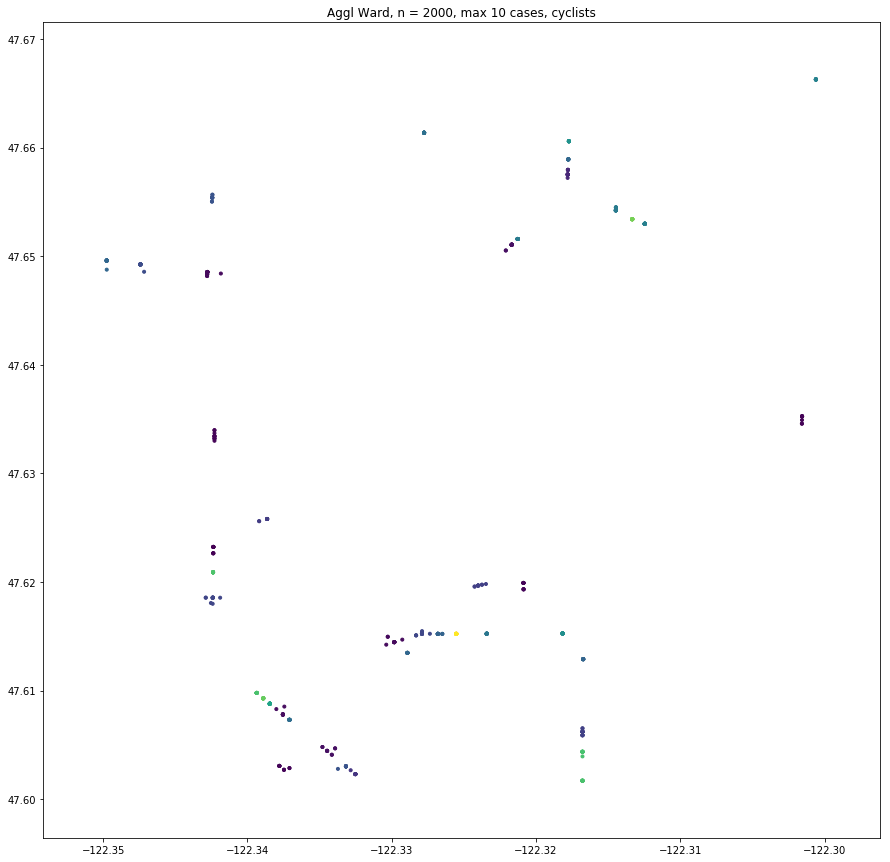

In [84]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(X_l[:,0],X_l[:,1],c=l[L_m],marker='.')

plt.title('Aggl Ward, n = {}, max 10 cases, cyclists'.format(n))
plt.savefig('../images_part2/agglWard_max10_{}_cy.png'.format(n))